# 🎯 Overfitting e Underfitting

Este notebook demonstra visualmente os conceitos de:
- Underfitting (modelo simples demais)
- Overfitting (modelo complexo demais)
Usando regressão polinomial com diferentes graus.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Dados simulados
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])

# Split em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y)


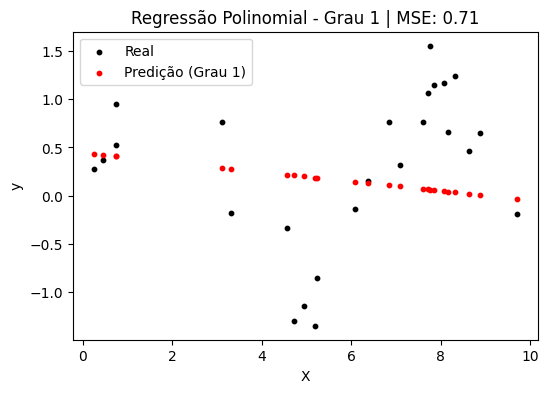

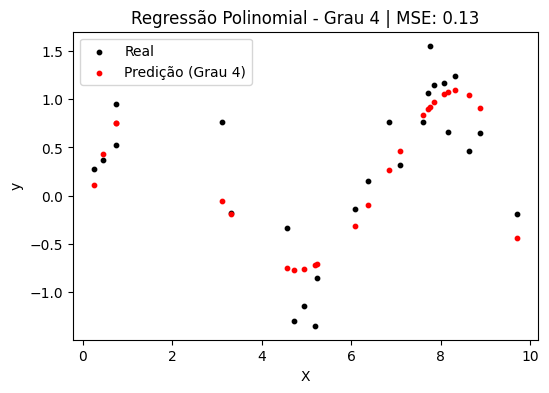

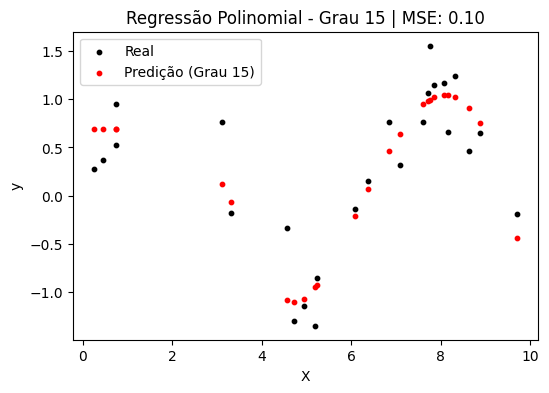

In [2]:
for degree in [1, 4, 15]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_test, y_test, color='black', s=10, label='Real')
    plt.scatter(X_test, y_pred, color='red', s=10, label=f'Predição (Grau {degree})')
    plt.title(f'Regressão Polinomial - Grau {degree} | MSE: {mean_squared_error(y_test, y_pred):.2f}')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()


In [3]:
# Exemplo com grau 4 (ajuste razoável)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
print("Erro quadrático médio (cross-validated):", -scores.mean())


Erro quadrático médio (cross-validated): 0.2573664639225003


## 🛠️ Técnicas para evitar overfitting e underfitting

- **Regularização (L1/L2)**: penaliza modelos complexos
- **Redução de dimensionalidade (PCA)**
- **Seleção de features relevantes**
- **Ensemble (RandomForest, XGBoost)**
- **Validação cruzada (k-fold)**: avalia generalização

Essas técnicas ajudam a encontrar o equilíbrio ideal entre viés e variância.


## 🧰 Regularização: Ridge (L2) e Lasso (L1)

Técnicas que adicionam penalidade à complexidade do modelo, ajudando a evitar overfitting.


In [4]:
from sklearn.linear_model import Ridge, Lasso

# Reutilizando grau 15 (muito complexo)
degree = 15
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=10000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"{name} Regression (Grau {degree}) - MSE: {mse:.3f}")


Linear Regression (Grau 15) - MSE: 0.132
Ridge Regression (Grau 15) - MSE: 0.136
Lasso Regression (Grau 15) - MSE: 0.112


/home/allanpablo/.local/share/virtualenvs/estatistica_devs-MKbpRP2F/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.744e+00, tolerance: 4.018e-03
  model = cd_fast.enet_coordinate_descent(


## 🌲 RandomForest: Ensemble que ajuda a reduzir overfitting

Random Forest é uma técnica baseada em múltiplas árvores com bagging e controle de profundidade.


In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RandomForest MSE:", mean_squared_error(y_test, y_pred_rf))


RandomForest MSE: 0.1347196493922161


## 🧪 Conclusão

- Modelos simples causam underfitting
- Modelos complexos demais overfitam
- Regularização e ensemble são formas eficazes de controle
- Validação cruzada é essencial para medir generalização
